# Classification through skills

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
resume_skills = pd.read_csv('Skills vector.csv')
resume_skills

,ID,Category,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,1,HR,-0.710533,-0.074217,0.066268,-0.113584,-0.124251,0.061736,0.098616,-0.053318,...,-0.231527,0.392007,0.166267,0.115508,0.200844,-0.063283,0.167736,0.002501,0.037053,-0.050652
1,2,HR,-0.696925,-0.054160,0.214620,0.141425,-0.232469,0.214465,-0.038483,0.010735,...,-0.558545,0.958565,0.349121,0.544004,-0.318300,-0.092770,0.115245,0.156241,0.258390,-0.508145
2,3,HR,-0.664720,0.177237,0.218054,-0.170673,-0.074760,-0.013726,-0.027480,0.147545,...,-0.330421,0.105010,0.090738,0.297232,-0.088549,0.047870,0.030775,0.078630,0.153044,-0.320382
3,4,HR,-0.718947,0.115111,0.168066,-0.063626,0.069027,0.167508,0.150011,-0.036661,...,-0.173333,0.069534,-0.010408,0.291434,-0.003617,-0.097566,0.183605,0.076674,0.002975,0.089710
4,5,HR,-0.689963,0.155193,0.132712,-0.184576,-0.053019,-0.108710,-0.155011,0.108082,...,-0.536356,0.199333,0.192593,0.284246,-0.196378,-0.172525,0.105732,0.009684,0.253444,-0.098125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3527,99416532,AVIATION,-0.696713,0.251959,0.120537,-0.209427,0.009797,0.053084,-0.087917,0.135812,...,-0.753227,0.327170,0.099310,0.194559,-0.257270,-0.221437,0.007480,-0.007909,0.245887,-0.128840
3528,24589765,AVIATION,-0.698405,0.241840,0.216531,-0.246620,-0.055549,-0.001329,-0.086175,0.104206,...,-0.549861,0.231877,0.037146,0.169673,-0.119322,-0.054518,0.060938,0.142400,0.180208,-0.158444
3529,31605080,AVIATION,-0.658531,-0.049343,0.125067,-0.222190,0.047781,0.111868,0.004313,-0.099303,...,-0.427288,-0.067027,-0.010075,0.178224,-0.303597,0.068539,0.245716,-0.039387,-0.039181,-0.018406
3530,21190805,AVIATION,-0.699583,0.161361,0.133785,-0.181137,0.005156,0.049871,0.065373,-0.072609,...,-0.522937,0.092938,-0.014762,0.267443,-0.080555,0.024349,0.122349,0.011404,0.034929,-0.027530


In [3]:
X = resume_skills.drop(columns = ['ID','Category']).to_numpy()
y = resume_skills['Category'] # Label

In [4]:
nums_of_category = y.drop_duplicates().shape # numbers of different category, k = 30
print(nums_of_category)

(30,)


In [43]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

scaler = MinMaxScaler()

scale = scaler.fit_transform(resume_skills[resume_skills.columns[2:302]])

df_scale = pd.DataFrame(scale, columns = [str(x) for x in range(300)]);
df_scale.head(5)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.760120,0.412646,0.600954,0.505179,0.376098,0.397528,0.576088,0.463267,0.500353,0.704016,...,0.412833,0.591439,0.664545,0.524688,0.586499,0.596106,0.615107,0.620191,0.564076,0.497881
1,0.790228,0.422897,0.718643,0.671297,0.306929,0.484956,0.407226,0.501970,0.612268,0.685049,...,0.267382,0.959621,0.777337,0.715784,0.185091,0.581530,0.578921,0.718273,0.704854,0.192795
2,0.861479,0.541162,0.721367,0.467990,0.407732,0.354331,0.420778,0.584636,0.459023,0.721114,...,0.368847,0.404932,0.617955,0.605731,0.362737,0.651051,0.520688,0.668759,0.637850,0.318007
3,0.741506,0.509410,0.681711,0.537723,0.499636,0.458076,0.639391,0.473331,0.595121,0.432096,...,0.438717,0.381878,0.555565,0.603146,0.428407,0.579159,0.626047,0.667511,0.542401,0.591484
4,0.805630,0.529895,0.653664,0.458934,0.421628,0.299958,0.263701,0.560791,0.495963,0.767454,...,0.277251,0.466229,0.680784,0.599940,0.279362,0.542106,0.572362,0.624773,0.701708,0.466224


In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scale)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
pca_df.head()

,principal component 1,principal component 2
0,0.059474,0.108919
1,1.273253,-0.316807
2,-0.421690,-0.498985
3,-0.826598,-0.282538
4,-0.100464,-0.278690


### [Elbow Method with Within-Cluster-Sum of Squared Error (WCSS)](https://en.wikipedia.org/wiki/Elbow_method_(clustering))
> In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set.

> In the [Elbow method](https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/#:~:text=Elbow%20Method,-In%20the%20Elbow&text=WCSS%20is%20the%20sum%20of,is%20largest%20when%20K%20%3D%201.), we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

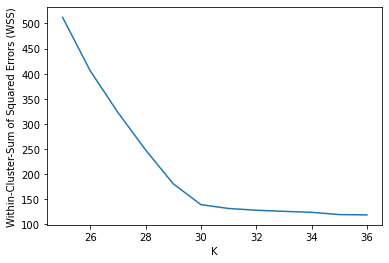

In [61]:
K=range(25,37)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(pca_df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

### [Silhouette (clustering)](https://en.wikipedia.org/wiki/Silhouette_(clustering)) 

> Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.[1] It was proposed by Belgian statistician Peter Rousseeuw in 1987. <br />
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.<br />
The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

In [60]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(25,37):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(pca_df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(pca_df,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 25 is 0.7753639949230402
Silhouette score for k(clusters) = 26 is 0.7909724333629772
Silhouette score for k(clusters) = 27 is 0.7968354375612499
Silhouette score for k(clusters) = 28 is 0.8198890366619458
Silhouette score for k(clusters) = 29 is 0.8291560667169837
Silhouette score for k(clusters) = 30 is 0.8317569929647527
Silhouette score for k(clusters) = 31 is 0.8000806656445087
Silhouette score for k(clusters) = 32 is 0.8101449914065367
Silhouette score for k(clusters) = 33 is 0.8040511688207421
Silhouette score for k(clusters) = 34 is 0.7990580719483387
Silhouette score for k(clusters) = 35 is 0.7764429969867577
Silhouette score for k(clusters) = 36 is 0.7591615559365332


In [54]:
kmeans = cluster.KMeans(n_clusters=30)
kmeans = kmeans.fit(pca_df)

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

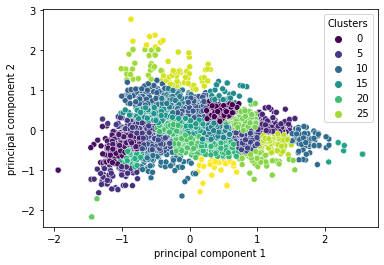

In [55]:
pca_df['Clusters'] = kmeans.labels_

sns.scatterplot(x="principal component 1", y="principal component 2",hue = 'Clusters',  data=pca_df,palette='viridis')

___
# TEST

In [8]:
agriculture = resume_skills[resume_skills["Category"] == 'AGRICULTURE']
digital_media = resume_skills[resume_skills["Category"] == 'DIGITAL-MEDIA']
combine = pd.concat([agriculture, digital_media], ignore_index=True, sort=False)
combine

,ID,Category,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,558,AGRICULTURE,-0.655780,0.143012,0.184913,-0.275173,-0.137315,-0.063996,-0.108617,-0.016094,...,-0.500930,0.073217,0.058121,0.345650,-0.003107,0.044188,0.031193,0.300713,0.205721,-0.435437
1,559,AGRICULTURE,-0.667090,0.091262,0.310103,-0.324840,0.029549,-0.089255,-0.194463,0.053524,...,-0.849813,0.199300,0.052646,0.331516,-0.178100,-0.069893,0.073340,0.272487,0.279820,-0.436403
2,560,AGRICULTURE,-0.659420,0.048198,0.345900,-0.570230,0.090037,-0.051197,-0.230580,0.003736,...,-0.858450,-0.211400,0.067577,0.543920,-0.217990,0.112600,0.157140,0.440050,0.342490,-0.453590
3,561,AGRICULTURE,-0.750810,-0.022794,-0.178900,-0.006871,-0.518410,-0.101670,0.118010,0.658580,...,1.088600,0.262360,0.226230,-0.161500,-0.281000,-0.232460,0.093438,0.405720,-0.203180,-0.456840
4,564,AGRICULTURE,-0.648500,0.332640,-0.137060,0.314940,-0.592020,-0.089594,0.135310,-0.055752,...,0.214110,0.642450,0.039209,-0.050890,0.426660,-0.092637,-0.220700,0.022039,-0.067818,-0.399130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,12085736,DIGITAL-MEDIA,-0.712673,0.238975,0.046997,-0.103429,-0.205531,0.055937,0.104965,-0.088966,...,-0.332382,0.125692,0.168534,0.225448,0.119206,-0.147494,0.032891,0.059746,0.058457,0.145000
215,20210676,DIGITAL-MEDIA,-0.716653,0.282512,0.074865,-0.004772,-0.225644,0.123147,0.090973,-0.180081,...,-0.439313,0.074165,0.031870,0.194257,0.054352,-0.149167,-0.064347,0.007942,0.090825,-0.085955
216,22706174,DIGITAL-MEDIA,-0.729209,0.462759,-0.068892,-0.068329,-0.240570,0.047197,0.139965,-0.149206,...,-0.371191,0.088664,0.128106,0.248867,0.068333,-0.287904,-0.075675,-0.152608,0.099766,0.121491
217,18354623,DIGITAL-MEDIA,-0.727891,0.188900,0.023002,-0.005946,-0.305524,0.122977,0.152952,-0.059270,...,-0.281506,0.058397,0.100979,0.230364,0.074011,-0.280572,-0.051087,-0.087045,-0.012822,0.262501


In [9]:
Xc = combine.drop(columns = ['ID','Category']).to_numpy()
yc = combine['Category'] # Label

In [10]:
tkm = KMeans(n_clusters=2,random_state = 0)
ty_km = tkm.fit_predict(Xc)
ty_km

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

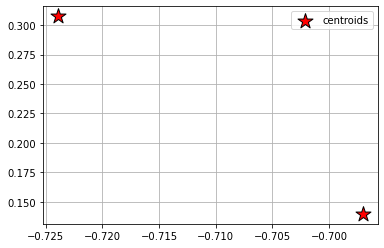

In [11]:
# plot the centroids
plt.scatter(
    tkm.cluster_centers_[:, 0], tkm.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [77]:
skills = pd.read_csv('Extract skills.csv')
print(skills['skills'].loc[[557,558,559,560,563,564,566,567,568,560]])
print(skills['skills'].loc[[2501,2502,2503,2504,2505,2506,2507]])

557     ['monitoring', 'testing', 'software']
558    ['monitoring', 'software', 'business']
559                ['monitoring', 'software']
560                             ['Zookeeper']
563                               ['testing']
564    ['monitoring', 'software', 'arborist']
566                               ['testing']
567                ['monitoring', 'software']
568                              ['software']
560                             ['Zookeeper']
Name: skills, dtype: object
2501    ['collaboration', 'iOS', 'Collaboration', 'sup...
2502    ['workflow', 'support', 'Customer relationship...
2503    ['support', 'Spring', 'Software', 'computer ha...
2504    ['Twitter', 'design', 'Business', 'Communicati...
2505    ['MARKETING', 'Marketing', 'business', 'Softwa...
2506    ['Search Engine', 'support', 'MARKETING', 'mar...
2507    ['support', 'communications', 'Mobile', 'CRM',...
Name: skills, dtype: object


In [64]:
scaler = MinMaxScaler()

scale = scaler.fit_transform(combine[combine.columns[2:302]])

df_scale = pd.DataFrame(scale, columns = [str(x) for x in range(300)]);
df_scale.head(5)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.935164,0.505701,0.642731,0.350104,0.573685,0.386565,0.212578,0.521148,0.578238,0.675931,...,0.204220,0.384271,0.432873,0.593672,0.500515,0.667924,0.584490,0.834357,0.675762,0.127942
1,0.892066,0.478255,0.840084,0.304199,0.740065,0.355403,0.089631,0.570559,0.536311,0.746034,...,0.029556,0.466207,0.423845,0.577126,0.306908,0.558274,0.638556,0.800803,0.748328,0.127010
2,0.921293,0.455415,0.896515,0.077394,0.800378,0.402355,0.037905,0.535222,0.367357,0.619051,...,0.025232,0.199311,0.448464,0.825767,0.262774,0.733678,0.746055,1.000000,0.809701,0.110440
3,0.573048,0.417763,0.069205,0.598085,0.193696,0.340086,0.537148,1.000000,0.029176,0.000000,...,1.000000,0.507187,0.710048,0.000000,0.193062,0.402022,0.664338,0.959189,0.275322,0.107307
4,0.962904,0.606274,0.135163,0.895522,0.120300,0.354984,0.561925,0.493000,1.000000,0.789690,...,0.562197,0.754192,0.401691,0.129480,0.975997,0.536414,0.261359,0.503072,0.407883,0.162945


In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scale)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
pca_df.head()

,principal component 1,principal component 2
0,2.563994,-0.851295
1,2.018780,-1.599028
2,3.322601,-1.910626
3,0.178681,2.447146
4,1.046781,1.267368


In [68]:
K=range(1,5)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(pca_df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

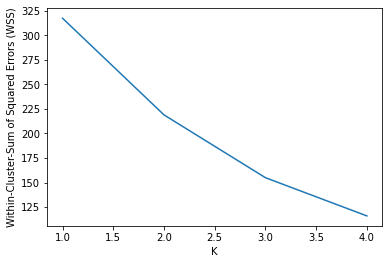

In [69]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [72]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,7):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(pca_df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(pca_df,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.330803825924208
Silhouette score for k(clusters) = 3 is 0.346317065516937
Silhouette score for k(clusters) = 4 is 0.33979360743998965
Silhouette score for k(clusters) = 5 is 0.35453075181807064
Silhouette score for k(clusters) = 6 is 0.34461967544375205


In [73]:
kmeans = cluster.KMeans(n_clusters=5)
kmeans = kmeans.fit(pca_df)

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

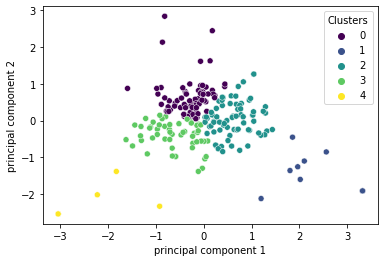

In [74]:
pca_df['Clusters'] = kmeans.labels_

sns.scatterplot(x="principal component 1", y="principal component 2",hue = 'Clusters',  data=pca_df,palette='viridis')

___

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # Set Train and Test dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

In [ ]:
error_rates = [] # find the optimal k
for i in np.arange(1, 40):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(X_train, y_train)

    new_predictions = new_model.predict(X_test)

    error_rates.append(np.mean(new_predictions != y_test))

In [ ]:
plt.plot(error_rates)

In [ ]:
from sklearn.metrics import accuracy_score
acc_K_NN = accuracy_score(predictions, y_test)
acc_K_NN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
print("KNN Classification Test Accuracy: {}%".format(round(knn.score(X_test,y_test)*100,2)))